# Sales Predictive analysis

## Explanatory data analysis

### Importing necessary libraries

In [2]:
import sys
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sys.path.append(os.path.abspath('../scripts'))
from Utils import DataUtils, EDA
from Plotting import Plots
data_utils = DataUtils()
plotting = Plots()
eda = EDA()

In [4]:
# Loading data
store = data_utils.load_data('store.csv')
train = data_utils.load_data('train.csv')
test = data_utils.load_data('test.csv')

2024-09-20 16:00 - DEBUG :: Loading data from file...
2024-09-20 16:00 - DEBUG :: Loading data from file...
c:\Users\user\Documents\Programming\Kifiya_10X\Sales_Predictive_Model\scripts\Utils.py:71: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(f"../data/{file_name}")
2024-09-20 16:00 - DEBUG :: Loading data from file...


In [5]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


#### Handling missing data and Datatypes

In [7]:
# Info about missing values
store_info = data_utils.data_info(store)


Dataset Overview
---------------------
- Total rows: 1115
- Total columns: 10

No Duplicated data found in the dataset.

Missing Data Summary
------------------------
- Columns with missing values: 6

- Column(s) with the most missing values: `Promo2SinceYear, Promo2SinceWeek, PromoInterval`
- Number of columns with more than 50% missing values: `0`

No columns with more than 50% missing values.

Detailed Missing Data Information
                           Missing Values  Missing Percentage Data Types
Promo2SinceYear                       544               48.79    float64
Promo2SinceWeek                       544               48.79    float64
PromoInterval                         544               48.79     object
CompetitionOpenSinceMonth             354               31.75    float64
CompetitionOpenSinceYear              354               31.75    float64
CompetitionDistance                     3                0.27    float64


In [8]:
store['Promo2'].value_counts()

Promo2
1    571
0    544
Name: count, dtype: int64

**Observation**
- From the output we can see that `544` columns represent were store did not participate in Promo2.
- Therefore, we can fill the missing values with zero.

In [9]:
store[store['CompetitionDistance'].isna()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


**Observation**
- The 3 competition distance that were missing was because there were no cometition.
- Therefore, we can fill the missing values with zero.

In [10]:
# Handling missing data
cols = ['CompetitionDistance', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'Promo2SinceWeek', 'Promo2SinceYear']
store[cols] = store[cols].fillna(0)
store['PromoInterval'] = store['PromoInterval'].fillna('No Promo')

In [11]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [12]:
# Sorting the datatypes to the proper type
cols = ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceYear']
store[cols] = store[cols].astype('int64')


In [12]:
# Info about missing values
train_info = data_utils.data_info(train)


Dataset Overview
---------------------
- Total rows: 1017209
- Total columns: 9

No Duplicated data found in the dataset.

No missing data found in the dataset.

Detailed Missing Data Information
Empty DataFrame
Columns: [Missing Values, Missing Percentage, Data Types]
Index: []


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [13]:
# Sorting the datatypes to the proper type
train['Date'] = pd.to_datetime(train['Date'])

In [14]:
# Info about missing values
test_info = data_utils.data_info(test)


Dataset Overview
---------------------
- Total rows: 41088
- Total columns: 8

No Duplicated data found in the dataset.

Missing Data Summary
------------------------
- Columns with missing values: 1

- Column(s) with the most missing values: `Open`
- Number of columns with more than 50% missing values: `0`

No columns with more than 50% missing values.

Detailed Missing Data Information
      Missing Values  Missing Percentage Data Types
Open              11                0.03    float64


#### Outliers

2024-09-20 10:39 - DEBUG :: Plotting Outliers...


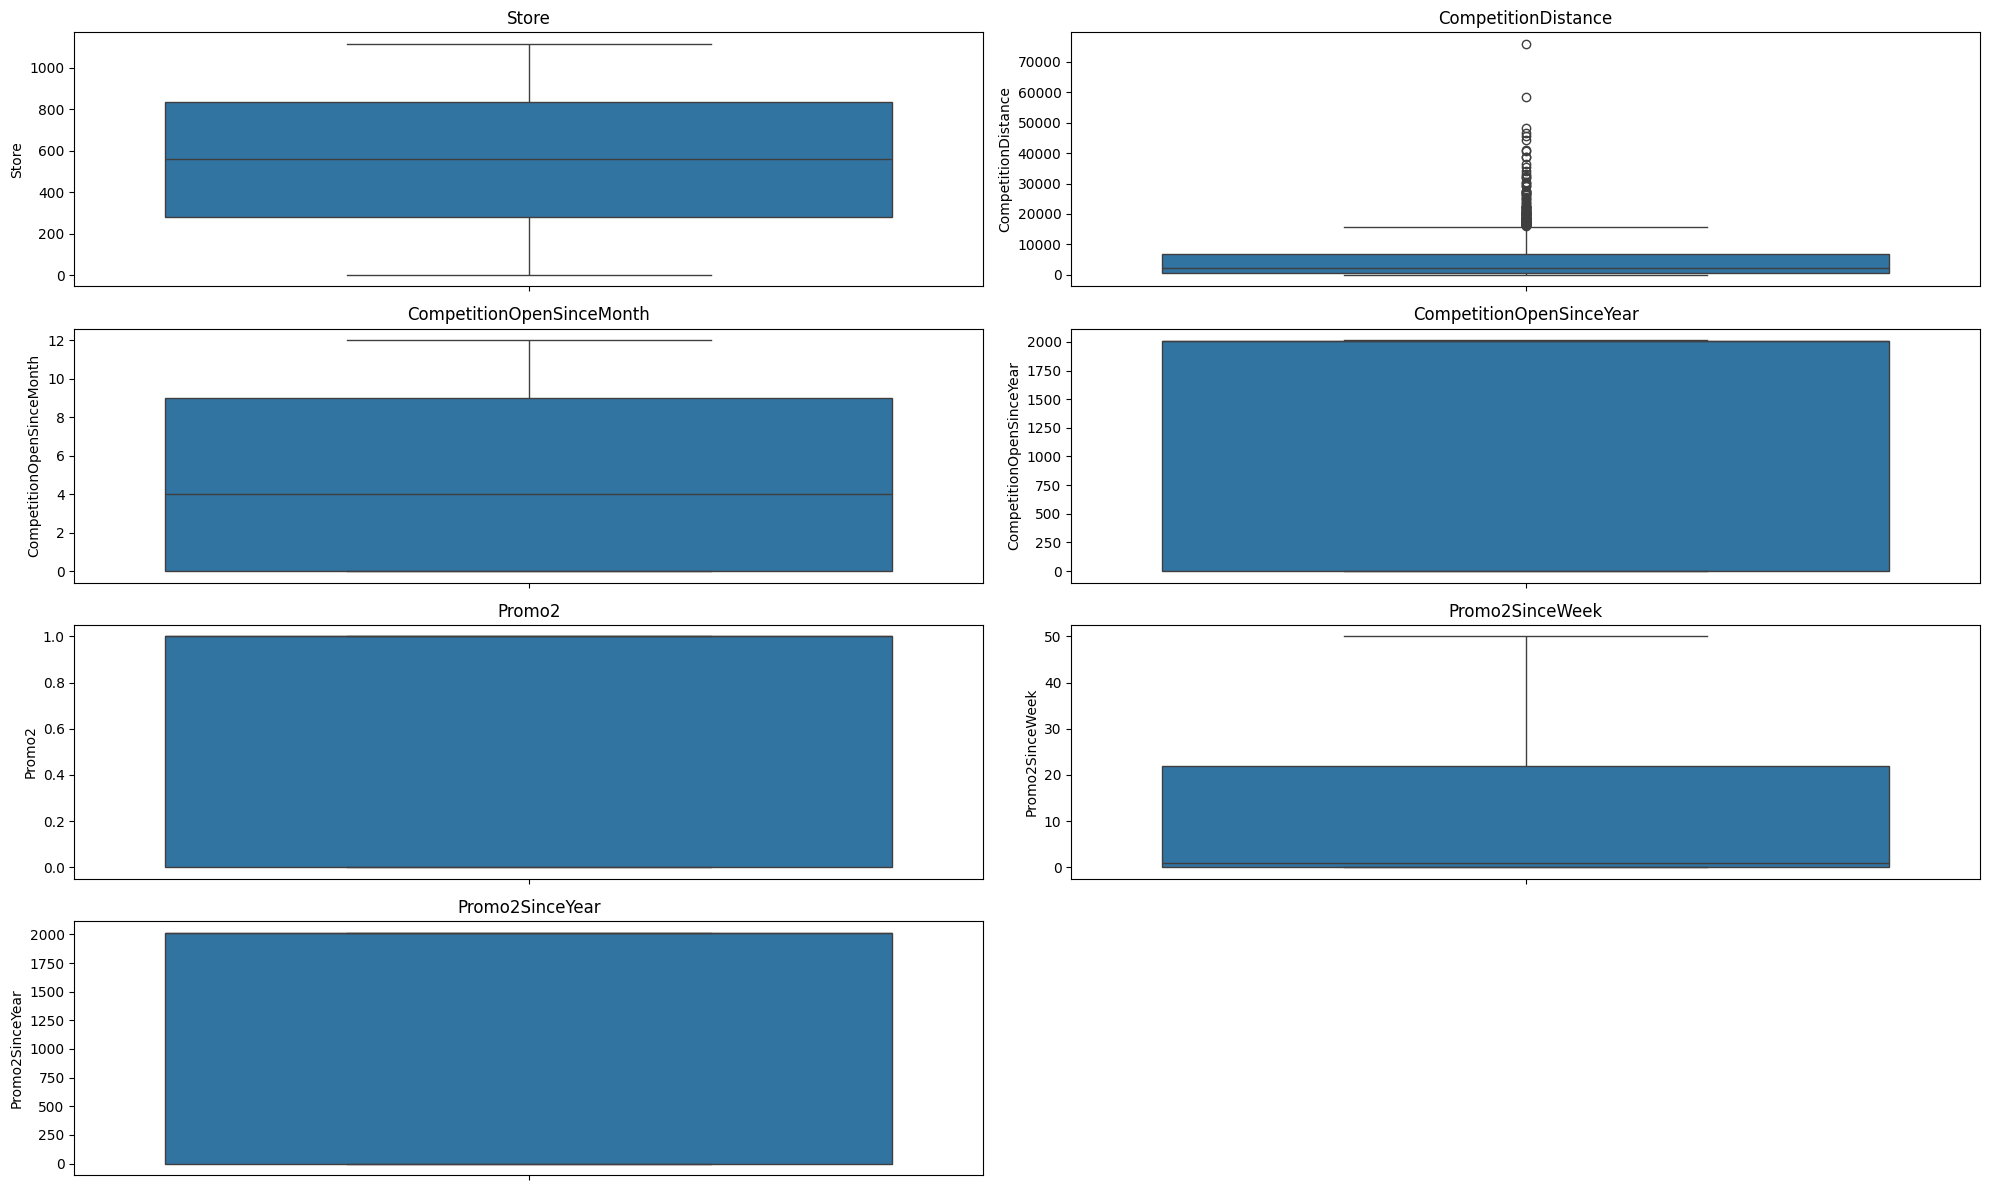

In [33]:
plotting.visualize_outliers(store)

**Observation**
- The store dataset doesn't contain outliers except the column `competitionDistance`

2024-09-20 10:32 - DEBUG :: Plotting Outliers...


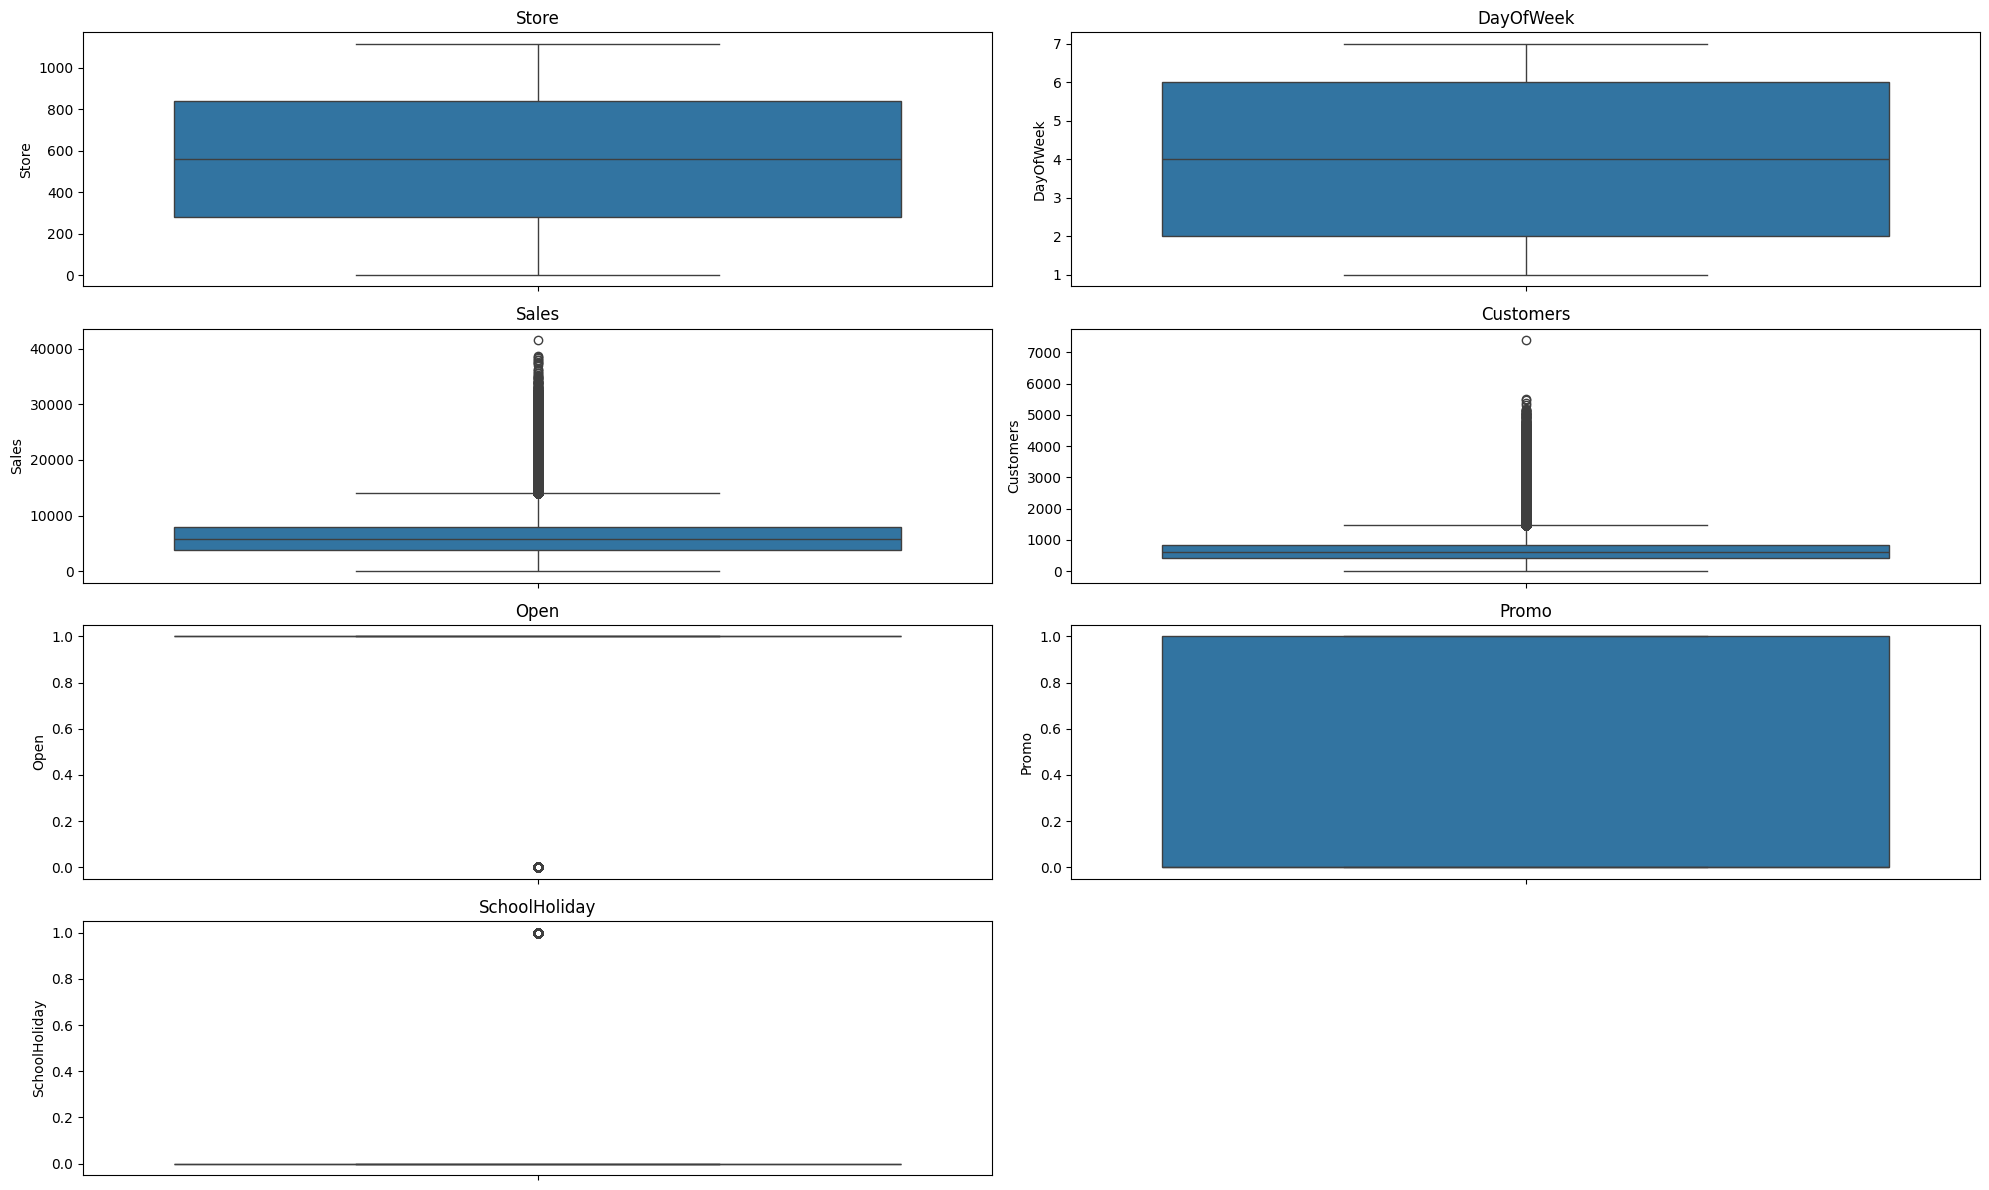

In [17]:
plotting.visualize_outliers(train)

**Observation**
- From the two datasets, the columns Customer and CompetitionDistance contain outliers. However, these outliers are not removed as they provide valuable insights into extreme customer behavior and competitive dynamics.
- Removing them could lead to the loss of critical information about high-performing stores, rare competitive pressures, or unique customer patterns that may significantly impact the overall analysis and model predictions. Therefore, we retained the outliers to preserve the integrity of the data and capture the full range of market behaviors.

####  Distribution of promotions in both training and test sets

In [15]:
change_pct = eda.distribution(train, test, 'Promo', 5)

2024-09-20 16:01 - DEBUG :: Checking for column distribution in different dataframes....


Similarity Overview

- The first dataset has 61.85% of the `0` value
- The second dataset has 60.42% of the `0` value
 The distribution of the column Promo are similar

 The percent change between the two dataset's value is 1.43% 


#### Sales behavior before, during, and after holidays


In [19]:
data = data_utils.holiday_generator(train)

2024-09-20 16:16 - DEBUG :: Adding holiday column...


2024-09-20 16:16 - DEBUG :: Plotting seasonal purchase behaviour of customers...


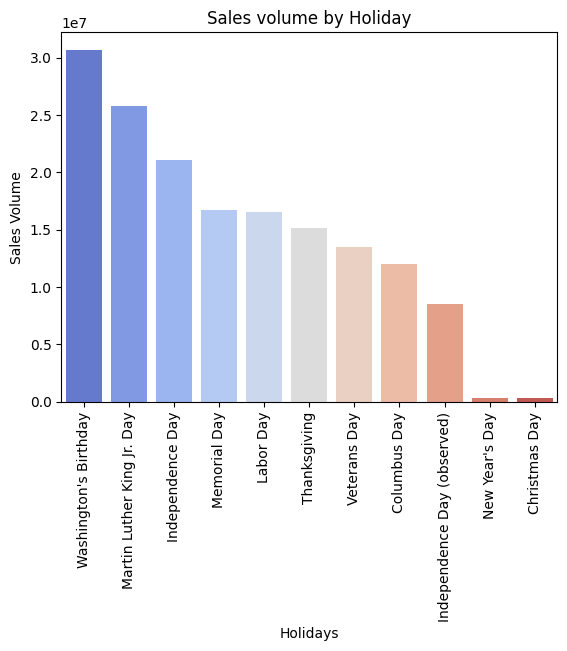

In [21]:
plotting.seasonal_purchase_behavior(data)

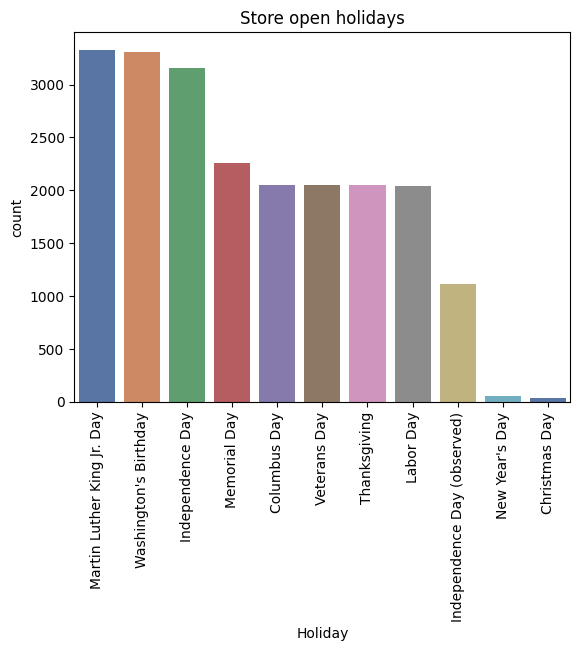

In [44]:
open_holiday = pd.DataFrame(data.loc[(data['Holiday'] != 'Not Holiday') & (data['Open'] == 1)]['Holiday'].value_counts())
sns.barplot(x= open_holiday.index, y = open_holiday['count'], hue=open_holiday.index, palette='deep')
plt.title('Store open holidays')
plt.xticks(rotation=90);

**Observation**
- From the above two plots we can conclude that opening stores on holidays is directly linked with sales volume.
- Holidays like Martin Luther king Jr. Day and Washington's Birthday the stores are open and we can see higher sales volume during those periods.

#### Correlation between sales and the number of customers

2024-09-20 10:32 - DEBUG :: locator: <matplotlib.ticker.AutoLocator object at 0x000001E868B76780>


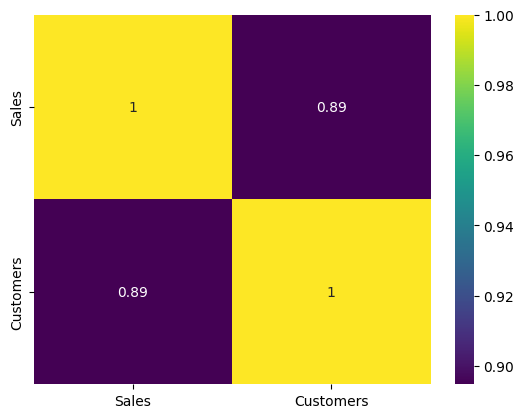

In [21]:
corr_data = train[['Sales', 'Customers']].corr()
sns.heatmap(corr_data, cmap= 'viridis', annot=True);

2024-09-20 10:32 - DEBUG :: Scatter plot between sales and customer
2024-09-20 10:32 - DEBUG :: locator: <matplotlib.ticker.AutoLocator object at 0x000001E858190AA0>


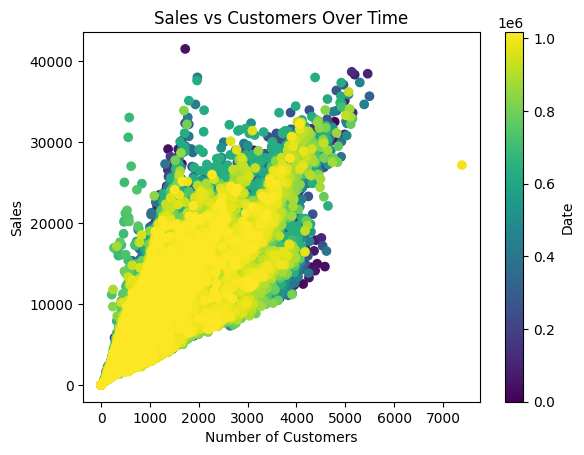

In [22]:
plotting.customer_sales_corr(train)

**Observation**
- From the plot we can see that as the number of customers increase the sales volume also increases.

#### Effect of Promo on sales and customer

2024-09-20 10:33 - DEBUG :: line plot between Promo and Sales


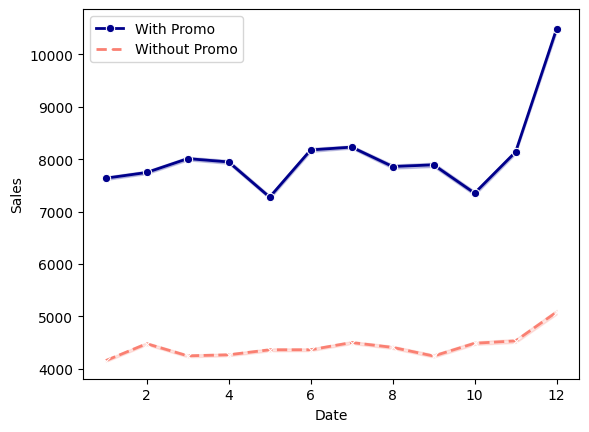

In [23]:
# Plot for effect of Promo on sales
plotting.effect_of_promo(train, 'Sales')

2024-09-20 10:33 - DEBUG :: line plot between Promo and Customers


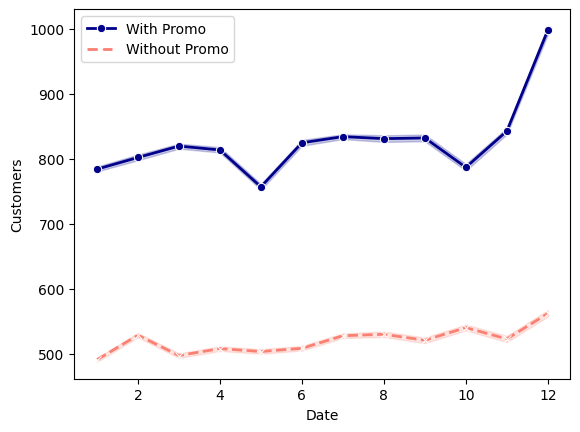

In [24]:
# Plot for effect of Promo on customers
plotting.effect_of_promo(train, 'Customers')

**Observation**
- From the plots we can see the effectiveness of Promo on sales and Customer. 
- Both sales volume and customer count increase while using 

#### Relation of Stores and promos 

In [25]:
stores_promos = eda.stores_promo(train)
stores_promos.head()

Sales and Promo Overview

 The top three columns that experience more than a 40% increase in total sales when using promotions.
 - Store number 198 has experienced a boost in sales of 50.38% when using Promo
 - Store number 607 has experienced a boost in sales of 44.06% when using Promo
 - Store number 543 has experienced a boost in sales of 41.41% when using Promo



 The top three columns that are better off without Promos.
 - Store number 274 has experienced a boost in sales of 72.31% without using Promo
 - Store number 262 has experienced a boost in sales of 58.26% without using Promo
 - Store number 948 has experienced a boost in sales of 57.15% without using Promo


,(No Promo / with Promo)%,store no promo,store with promo
Store,,,
198,49.62,752235,1516038
607,55.94,1094625,1956669
543,58.59,805164,1374123
575,60.29,1257813,2086181
271,61.69,2333756,3782763


#### Trends of customer during store opening and closing times

<Axes: xlabel='Open'>

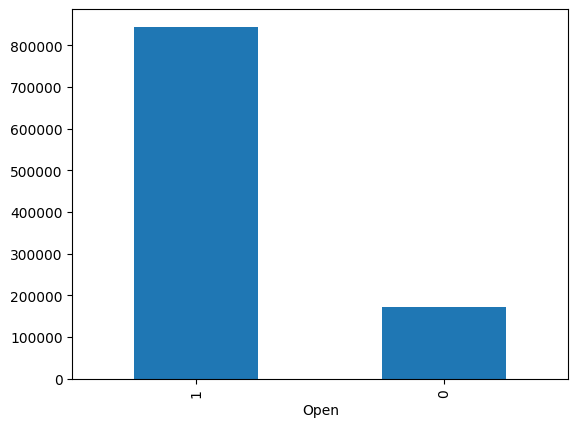

In [26]:
train['Open'].value_counts().plot(kind='bar')

<Axes: xlabel='Open'>

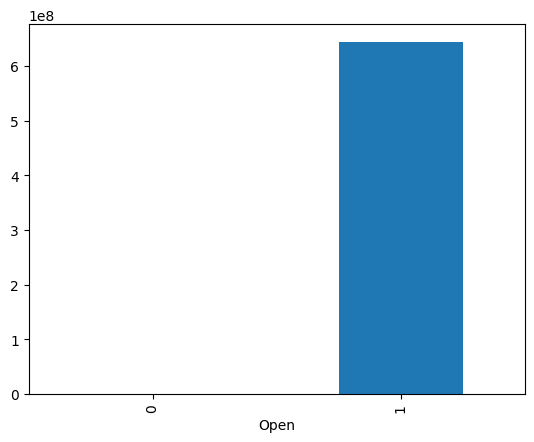

In [27]:
train.groupby(by='Open')['Customers'].sum().plot(kind='bar')

**Observation**
- We can see that there are no customers when the store closes

#### Effect of sales on Weekend

2024-09-20 10:33 - DEBUG :: plotting the effect of weekday openings on weekend sales...


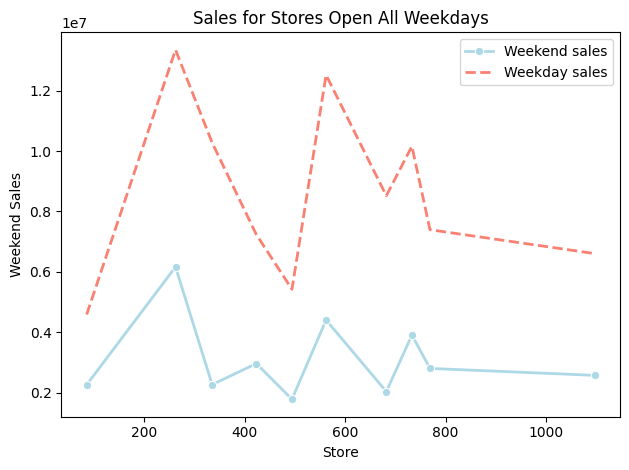

In [28]:
plotting.sales_weekend_weekday(train, all_weekday = True)

2024-09-20 10:33 - DEBUG :: plotting the effect of weekday openings on weekend sales...


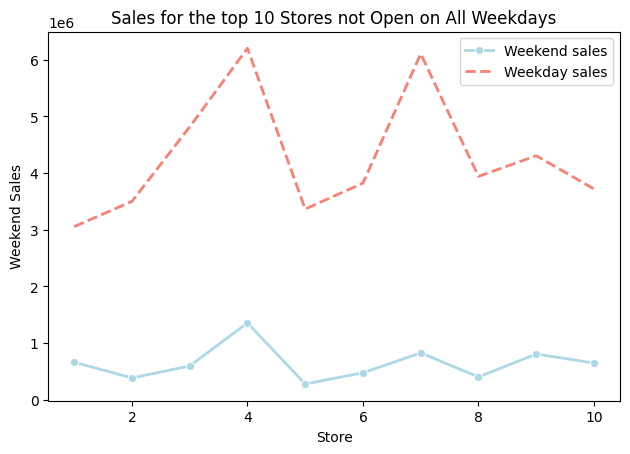

In [29]:
plotting.sales_weekend_weekday(train, all_weekday = False)

**Insights and Recommendations**
- Stores not open on all weekdays show strong weekday performance, suggesting targeted weekday operations can be highly beneficial. Their lower weekend sales might indicate a need for better weekend planning or more consistent weekend operations.
- Stores open all weekdays also display stronger weekday performance, but the overall revenue could be boosted by focusing on weekend marketing strategies.


#### Assortment type and sales

Text(0.5, 1.0, 'Assortment type vs Sales')

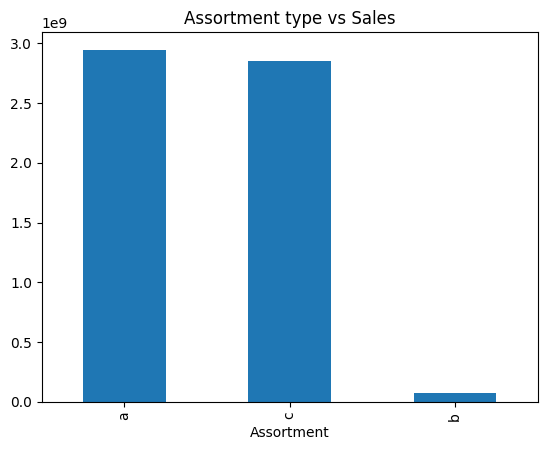

In [45]:
Sales = train.groupby(by='Store')['Sales'].sum()
Sales = pd.DataFrame(Sales)
store_sales = store.merge(Sales,left_on='Store',right_on=Sales.index)
store_sales.groupby(by='Assortment')['Sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Assortment type vs Sales')

**Observation:**
- We can see that assortment types A and C are efficient in delivering value, while assortment type B appears ineffective and does not contribute to our objectives. This suggests that we may need to reevaluate our strategy for type B to enhance its performance or consider reallocating resources to the more effective types.

#### Competition and Sales

2024-09-20 10:33 - DEBUG :: Plotting effect of competition on sales....


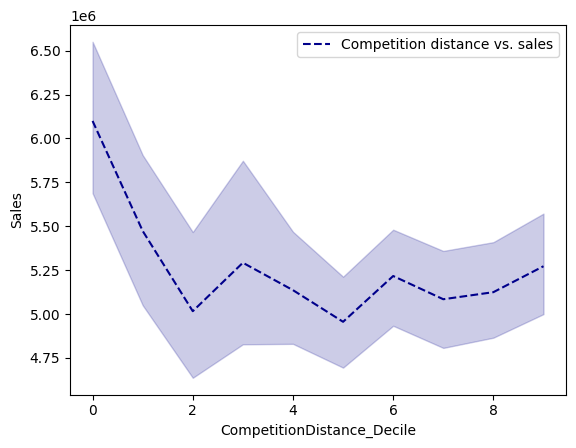

In [31]:
plotting.competition_sales(store_sales)

**Observation:** 
- We observe that as the distance between competitors decreases, the number of sales also decreases. This indicates that most competition is concentrated in the city center, suggesting a highly competitive environment that may impact sales performance.


**Recommendation:**
- To capture a share of the existing market, we should consider opening new stores in the city center. This approach allows us to leverage the established customer base and competitive landscape rather than attempting to create a new market in less populated areas, which may not yield sufficient sales. By positioning ourselves strategically in the city center, we can effectively compete for customers and increase our market share.
